
------   No-Feature-Selection KNN   -----

Accuracy: 63.934426229508205
precision: 63.779353123615415
Recall: 63.934426229508205
F1: 63.577733741668176

------   No-Feature-Selection Naive Bayesian   -----

Accuracy: 70.49180327868852
precision: 70.49180327868852
Recall: 70.49180327868852
F1: 70.49180327868852

-----   No-Feature-Selection SVM   -----

Accuracy: 62.295081967213115
precision: 64.4624842370744
Recall: 62.295081967213115
F1: 58.88903697780147

-----   No-Feature-Selection Bagging   -----

Accuracy: 77.04918032786885
precision: 77.0419744190236
Recall: 77.04918032786885
F1: 76.96167720275724

-----   No-Feature-Selection Boosting   -----

Accuracy: 75.40983606557377
precision: 75.78497205236899
Recall: 75.40983606557377
F1: 75.07028671547124


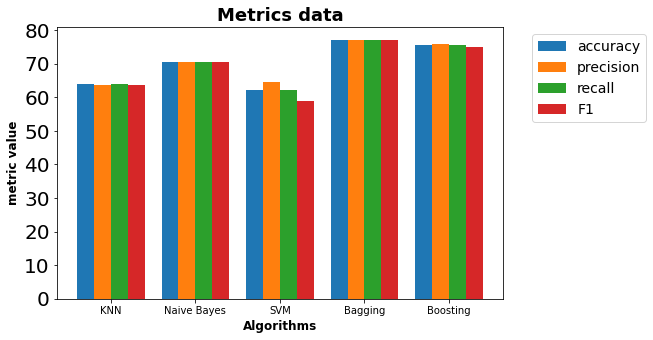

[2, 4, 6, 8, 9, 11, 12]

------   Feature-Selection KNN   -----

Accuracy: 65.57377049180327
precision: 65.41894353369763
Recall: 65.57377049180327
F1: 65.47869667377458

------   Feature-Selection Naive Bayesian   -----

Accuracy: 85.24590163934425
precision: 85.21129326047358
Recall: 85.24590163934425
F1: 85.20515571733195

-----   Feature-Selection SVM   -----

Accuracy: 59.01639344262295
precision: 57.95225769341387
Recall: 59.01639344262295
F1: 57.6916708064249

-----   Feature-Selection Bagging   -----

Accuracy: 81.9672131147541
precision: 83.26282390269698
Recall: 81.9672131147541
F1: 82.06455609389172

-----   Feature-Selection Boosting   -----

Accuracy: 85.24590163934425
precision: 85.80236009044658
Recall: 85.24590163934425
F1: 85.31797050514936


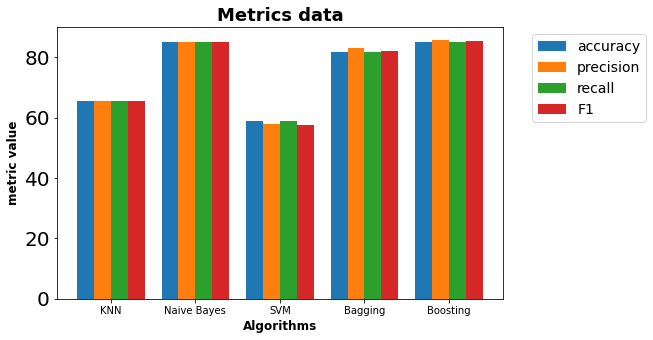

In [60]:

import csv
import pandas as pd
import re
import sqlite3
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1234)


     

class process_file:   # Preprocess the data by reading the csv file.
    
    def __init__(self,file_name,delimiter,header,first_omit):
        
        self.file_name=file_name
        self.delimiter=delimiter
        self.header=header
        self.first_omit=first_omit
        
    def read_file(self):   # extracting the header and the rows from the csv.
        
        self.rows=[]
        with open(self.file_name) as file:
            if self.delimiter==None:
                content=csv.reader(file)
            else:
                content=csv.reader(file,delimiter=self.delimiter)
            if self.header==True and self.first_omit==True:
                self.header = next(content)
                self.header=self.header[1:]
                [self.rows.append(i[1:]) for i in (content)]
            else:
                self.header = next(content)
                [self.rows.append(i) for i in (content)]
            
            table_data=self.data_type()
        return table_data
            
    def data_type(self):    # Getting the data type of the header.
        
        first_row=self.rows[0]
        temp_dict=dict.fromkeys(self.header,0)
        
        for i in range(0,len(first_row)):
            if (re.compile('[0-9]+\.[0-9]+')).match(first_row[i]):
                temp_dict[self.header[i]]="double"
                
            elif (re.compile('^[0-9]+$')).match(first_row[i]):
                temp_dict[self.header[i]]="Number"
        
            else:
                temp_dict[self.header[i]]="varchar"
                
        self.table_head=temp_dict
        
        file_name=self.file_name.split("/")[-1].split(".")[0]
        create_preprocess_obj=Preprocess_data(self.table_head.values(),self.rows)
        insert_rows_data=list(create_preprocess_obj)
        normalize_tables(file_name,self.table_head,insert_rows_data)
            
        #create_db_obj=create_insert_data_table(self.file_name,self.table_head,insert_rows_data)
        
        #return create_db_obj.display_rows()  
        


class normalize_tables(process_file):
    def __init__(self,file_name,table_head,rows_data):
        global tables
        create_database(file_name)
        tables=[]
        n=(len(table_head))
        table_head=list(table_head.items())
        col_data=[]
        global df
        df=[]
        
        for j in range(0,n):
            for i in rows_data:
                col_data.append(i.split(",")[j])
            col_data=sorted(set(col_data))
            if len(col_data)<5:
                tables.append(table_head[j][0])
                create_insert_data_table(table_head[j][0],table_head[j][1],col_data)
            col_data=[]
            
        Final_table(file_name,tables,table_head,rows_data)
            
class create_database:   # Creating the db, table and inserting the rows into db.
    
    
    def __init__(self,file_name):
        
        global conn,cur
        file_name=file_name.replace(" ","")
        column_names="("
        conn=sqlite3.connect(file_name+".db;")
        cur=conn.cursor()
        
class create_insert_data_table:        # Creating and inserting normalised tables.
    
    def __init__(self,col_name,col_data_type,rows):
        dict_country={}
        drop_table="drop table if exists "+col_name+";"
        conn.execute(drop_table)
        conn.commit()
        
        create_table="create table if not exists "+col_name+"("+col_name+"id integer Primary Key autoincrement,"+col_name+" "+col_data_type+" not null)"
        table=conn.execute(create_table)
        conn.commit()
        
        insert_query="Insert or replace into "+col_name+" ("+col_name+") values "
        for i in rows:
            insert_query+="("+i+"),"
           
        insert_query=insert_query[0:len(insert_query)-1]+";"
        insert_rows=conn.execute(insert_query)
        conn.commit()
        
        sql_statement="select * from "+col_name+";"
        cur = conn.cursor()
        cur.execute(sql_statement)

        data = cur.fetchall()
        for i in data:
            dict_country[str(i[1])]=i[0]
        df.append(dict_country)
        
class Final_table:          # Final table
    
    def __init__(self,file_name,tables,table_head,rows_data):
        global rows
        table_name=file_name.replace(" ","_")
        foreign_key=""
        column_names=""
        
        drop_table="drop table if exists "+table_name+";"
        conn.execute(drop_table)
        conn.commit()
        
        
        create_table="create table if not exists "+table_name+"("
        for i in table_head:
            column_names+=i[0]+","
            create_table+=i[0]+" "+i[1]+" not null,"
            if i[0] in tables:
                foreign_key+="foreign key("+i[0]+") references "+ i[0]+"("+i[0]+"),"
                
        create_table+=foreign_key[:len(foreign_key)-1]+")"
        table=conn.execute(create_table)
        conn.commit()
        
        column_names=column_names[0:len(column_names)-1]
        insert_query="Insert into "+table_name+" ("+column_names+") values "
        final_data=[]
        
        for i in rows_data:
            i=i.split(",")
            data=""
            for j in range(0,len(i)):
                if table_head[j][0] in tables:
                    key=tables.index(table_head[j][0])
                    key=df[key]
                    value=i[j].replace("\"","")
                    value=key[value]
                else:
                    value=i[j]
                data+=str(value)+","
            final_data.append(data[:len(data)-1])
            
        for i in final_data:
            insert_query+="("+i+"),"
        #print(insert_query[:len(insert_query)-1])
        insert_rows=conn.execute(insert_query[:len(insert_query)-1])
        conn.commit()
        
        self.display_rows(table_name)
        
    def display_rows(self,table_name):   # Displaying the rows in the table and returning it.
        
        global rows
        sql_statement="select * from "+table_name+";"
        rows = pd.read_sql_query(sql_statement, conn)
        return rows
            
            
class Preprocess_data(create_insert_data_table):   # Preprocess the data ie.. inserting missing values in the rows.
    
    def __init__(self,values,rows):
        
        self.final_rows_list=[]
        values=list(values)
        for i in rows:
            temp=""
            for j in range(0,len(values)):
                if values[j]=="varchar":
                    i[j]="\""+i[j]+"\""
                if i[j]=="":
                    if values[j]=="Number":
                        i[j]="0"
                    elif values[j]=="double":
                        i[j]="0.0"
                    else:
                        i[j]="null"
                temp+=i[j]+","
            self.final_rows_list.append(temp[0:len(temp)-1])
        
    def __iter__(self):  #return the list of the rows using iter.
        
        return iter(self.final_rows_list)  
    
    
class algo:
    
    def __init__(self,val,x,y):
        self.val=val
        self.x_train,self.x_test,self.y_train,self.y_test = train_test_split(x, y, test_size=0.20)
        self.knn()
        self.nb()
        self.svm()
        self.bag()
        self.boost()
        self.graph()
        
    def Metric_Calculation(self,predicted,expected):
        
        
        a=metrics.accuracy_score(expected,predicted,normalize=True,sample_weight=None)
        acc.append(a*100)
        
        precision = precision_score(expected,predicted,average='weighted')
        pre.append(precision*100)
        
        recall = recall_score(expected, predicted, average='weighted')
        re.append(recall*100)
     
        f1 = f1_score(expected, predicted, average='weighted')
        f.append(f1*100)

        print("Accuracy: "+str(a*100))
        print("precision: "+str(precision*100))
        print("Recall: "+str(recall*100))
        print("F1: "+str(f1*100))
        
        
        
        
    def knn(self):

        print("\n------   "+self.val+" KNN   -----\n")
        knn=neighbors.KNeighborsClassifier()
        knn.fit(self.x_train,self.y_train)
        predicted=knn.predict(self.x_test)
        expected=self.y_test
        self.Metric_Calculation(predicted,expected)
        
        
        
    def nb(self):
        print("\n------   "+self.val+" Naive Bayesian   -----\n")
        classifier = GaussianNB()
        classifier.fit(self.x_train,self.y_train)
        predicted =classifier.predict(self.x_test)
        #print(predicted)
        expected=self.y_test
        self.Metric_Calculation(predicted,expected)
        
    def svm(self):
        print("\n-----   "+self.val+" SVM   -----\n")
        clf = svm.SVC()
        clf.fit(self.x_train,self.y_train)
        predicted = clf.predict(self.x_test)
        expected=self.y_test
        self.Metric_Calculation(predicted,expected)

        
    def bag(self):
        print("\n-----   "+self.val+" Bagging   -----\n")
        bgclassifier = BaggingClassifier()
        bgclassifier.fit(self.x_train,self.y_train)
        predicted = bgclassifier.predict(self.x_test)
        expected=self.y_test
        self.Metric_Calculation(predicted,expected)

    
    def boost(self):
        print("\n-----   "+self.val+" Boosting   -----\n")
        model = GradientBoostingClassifier()
        model.fit(self.x_train,self.y_train)
        predicted = model.predict(self.x_test)
        expected=self.y_test
        self.Metric_Calculation(predicted,expected)        
        
    def graph(self):
        algos = ["KNN","Naive Bayes","SVM","Bagging","Boosting"]
        fig, ax = plt.subplots(figsize=(8,5))
        w = 0.2
        bar1_x_position = np.arange(len(algos))
        bar2_x_position = [ i+w for i in bar1_x_position ]
        bar3_x_position = [ i+w for i in bar2_x_position ]
        bar4_x_position = [ i+w for i in bar3_x_position ]
        

        plt.bar(bar1_x_position,acc,w,label="accuracy")
        plt.bar(bar2_x_position,pre,w,label="precision")
        plt.bar(bar3_x_position,re,w,label="recall")
        plt.bar(bar4_x_position,f,w,label="F1")

        plt.title("Metrics data",fontweight="bold",fontsize=18)
        plt.xlabel("Algorithms",fontsize=12,fontweight="bold")
        plt.ylabel("metric value",fontsize=12,fontweight="bold")
        plt.xticks(bar1_x_position+w/2+w,algos,fontsize=10)
        plt.yticks(fontsize=20)
        plt.legend(fontsize = 14,bbox_to_anchor=(1.05, 1),loc='upper left')
        plt.show()
        
class Feature_Selecetion:
    def __init__(self):
        
        feature_extract=[]
        x = rows.iloc[: , :-1]
        y=rows.target
        global acc,f,pre,re
        acc=[]
        f=[]
        pre=[]
        re=[]
        algo("No-Feature-Selection",x,y)
        
        mut_info=MIC(x, y)
        base=(sum(mut_info)/len(mut_info))
        for i in range(0,len(mut_info)):
            if mut_info[i]>= base:
                feature_extract.append(i)
                
        print(feature_extract)
        extract_features=(rows.iloc[:,feature_extract])
        acc=[]
        f=[]
        pre=[]
        re=[]
        algo("Feature-Selection",extract_features,y)
        

process_file_obj=process_file(r"/Users/varunmeka/Downloads/dataset/heart disease classification dataset.csv",None,True,True)
data_retrieve=process_file_obj.read_file()
Feature_Selecetion()



